# IE 440 Final Neural Networks Question

## Yusuf Sina Öztürk - 2017402153

In [1]:
# Importing necessary libraries
import timeit
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import csv
sns.set(rc={'figure.figsize':(8,6)})

### Reading Data 
First of all, we need to read training and test data.

In [15]:
tra_df = pd.read_csv("IE440Final21Training.txt", sep = " ", header = None)
tra_df.head()

,0,1
0,202.244533,205.911997
1,246.086103,131.740057
2,217.733948,154.888272
3,207.765176,209.428655
4,247.532442,203.268001


In [16]:
test_df = pd.read_csv("IE440Final21Test.txt", sep = " ", header = None)
test_df.head()

,0,1
0,205.239351,230.537236
1,173.782068,192.352956
2,176.423489,189.842669
3,220.181151,148.231021
4,171.905183,224.302252


In [17]:
x = tra_df
x = x.to_numpy()
test = test_df
test = test.to_numpy()

### Question 1 (Least Square Method)

In order to solve the first question, I am going to use DFP (Davidon - Fletcher - Powell) Method.

First, I need to define functions, gradients of the functions, exact line search algorithm and euclidian distance calculator function in order to use as stopping condition.

In [2]:
#defining the first function

def f1(w1):
    return (np.sum((x[1] - w1[0] - w1[1]*x[0])**2))

In [3]:
# defining gradient of the first function with respect to w0 and w1 respectively

def grad_f1(w1):
    grad = np.zeros(2)
    grad[0] = -2 * np.sum( x[:,1] - w1[0] - w1[1] * x[:,0])
    grad[1] = -2 * np.sum( x[:,0] * ( x[:,1] - w1[0] - w1[1]*x[:,0] ))
    return grad

In [4]:
#defining the second function

def f2(w2):
    return (np.sum((x[:,1] - w2[0] - w2[1]*x[:,0] - w2[2] * (x[:,0])**2 - w2[3] * (x[:,0])**3 )**2))

In [5]:
def grad_f2(w2):
    grad = np.zeros(4)
    grad[0] = -2 * np.sum( x[:,1] - w2[0] - w2[1]*x[:,0] - w2[2] * (x[:,0])**2 - w2[3] * (x[:,0])**3 )
    grad[1] = -2 * np.sum( x[:,0] * ( x[:,1] - w2[0] - w2[1]*x[:,0] - w2[2] * (x[:,0])**2 - w2[3] * (x[:,0])**3 ))
    grad[2] = -2 * np.sum( x[:,0]**2 * ( x[:,1] - w2[0] - w2[1]*x[:,0] - w2[2] * (x[:,0])**2 - w2[3] * (x[:,0])**3 ) )
    grad[3] = -2 * np.sum( x[:,0]**3 * ( x[:,1] - w2[0] - w2[1]*x[:,0] - w2[2] * (x[:,0])**2 - w2[3] * (x[:,0])**3 ) )
    return grad

In [6]:
def euc_distance(a,b):
    return np.sqrt((a[0]- b[0])**2 + (a[1]-b[1])**2)

In [7]:
# Exact line search algorithm to decide on the steplength 

#f : function; 
#d : direction; 
#x : kth value of x;
#a and b : interval to search for best alpha;
#eps : step length for incrementian 

def exact_line(f,d,x,a,b,eps):
    min_val = 10000000000000000
    best_alpha = 0
    interval = np.arange(a,b,eps)
    for alpha in interval:
        if(f(x+(alpha*np.array(d)))<= min_val):
            min_val = f(x+(alpha*np.array(d)))
            best_alpha = alpha
    return best_alpha

### DFP Method

To solve the first part of the question, I am going to use DFP method as we used in previous homeworks.

In [25]:
def dfp_method(eps1,f,g,a,b,eps2,w0):
    w = np.zeros((100000,2))
    H = np.identity(2)               
    k = 0
    w[0] = w0 # initial points 
    stop = True
    while(stop):
        w_vals.append(w[k])
        direction = -1 *  np.dot(H, np.transpose( g(w[k])))
        directions.append(direction)
        if(euc_distance(w[k],w[k-1]) <= eps1): # euclidean distance as stopping condition 
            stop = False
            alpha_vals.append("-")
            w_next_vals.append("-")
        else:
            alpha = exact_line(f,direction,w[k],a,b,eps2)
            alpha_vals.append(alpha)     
            w[k+1] = w[k] + alpha * direction
            w_next_vals.append(w[k+1])
            p = w[k+1] - w[k]
            q = np.transpose(g(w[k+1])) - np.transpose(g(w[k]))
            A = (np.dot(p,np.transpose(p)))/(np.dot(np.transpose(p),q))
            B = -np.dot(np.dot(H,q),np.dot(np.transpose(q),H))/(np.dot(np.dot(np.transpose(q),H),q))
            H = H + A + B
            k = k+1
            print("w",w[k])
        
    return w[k]  

Running the algorithm for the first function

In [26]:
alpha_vals= [] # array to keep alpha values at every iteration
w_vals = []  # array to keep x values at every iteration
w_next_vals = []  # array to keep x(k+1) values at every iteration
directions= []  # array to keep direction values at every iteration

output = dfp_method(0.0001, f1,grad_f1,-20,20,0.0005, [110.00, 1.00])

w [110.00000105   1.00061459]
w [109.99938506   1.00061353]
w [110.14894951   1.15079291]
w [109.91620037   0.9190007 ]
w [110.02056487   1.02379427]
w [109.85815303   0.86205014]
w [109.93097533   0.93517181]
w [109.81764806   0.82231042]
w [109.86845968   0.87333091]
w [109.78938486   0.79458115]
w [109.82483752   0.83017953]
w [109.7696642    0.77523299]
w [109.79439976   0.80007021]
w [109.75590452   0.76173319]
w [109.77316218   0.77906175]
w [109.74630429   0.75231423]
w [109.75834434   0.76440375]
w [109.73960632   0.74574272]
w [109.748006     0.75417689]
w [109.73493339   0.74115798]
w [109.7407932    0.74704184]
w [109.73167335   0.73795944]
w [109.73576116   0.74206403]
w [109.72939908   0.73572806]
w [109.73225066   0.73859133]
w [109.72781255   0.73417143]
w [109.7298017    0.73616871]
w [109.72670583   0.73308554]
w [109.72809334   0.73447871]
w [109.72593385   0.73232806]
w [109.72690165   0.73329981]
w [109.72539537   0.73179969]
w [109.72607041   0.73247747]
w [109.725

In [28]:
w_values = w_vals[len(w_vals)-1]
w_values

array([109.72430798,   0.73073358])

In [40]:
w_values[0]

109.72430798446568

In [54]:
w0 = w_values[0]
w1 = w_values[1]

In [55]:
w0

109.72430798446568

So our w values are:

- w0 = 109.72430798 (intercept)
- w1 = 0.73073358 (slope)

In [33]:
x_values = x[:,0]
y_values = x[:,1]

### Plotting the data and regression lines

#### Training Data and Regression Line

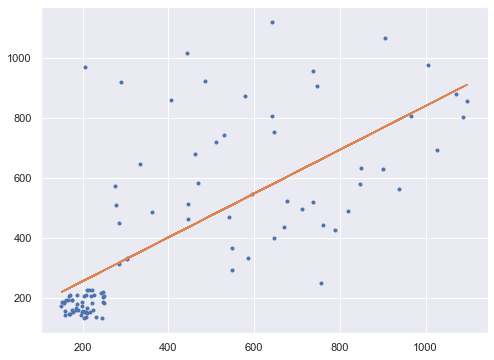

In [56]:
plt.plot(x_values,y_values, '.')
plt.plot(x_values,w0 + w1 * x_values )

#### Test Data and Regression Line

In [62]:
x_test_values = test[:,0]
y_test_values = test[:,1]

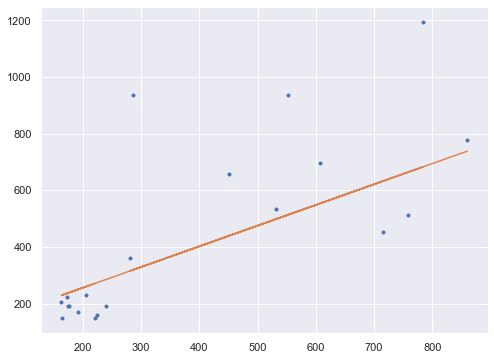

In [65]:
plt.plot(x_test_values,y_test_values, '.')
plt.plot(x_test_values,w0 + w1 * x_test_values )

### Reporting the Error Values

#### Training SSE

In [80]:
error_matrix = np.zeros((4,3)) # to report at the end

In [81]:
sse = 0
for i in range(len(x_values)):
    sse = sse + (y_values[i] - (x_values[i]*w1 + w0))**2

For the first linear regression function, we have training SSE:

In [82]:
sse

3835811.593155594

In [83]:
error_matrix[0,0] = sse

#### Test MSE

In [115]:
test_mse = 0
for i in range(len(x_test_values)):
    test_mse = test_mse + (y_test_values[i] - (x_test_values[i]*w1 + w0))**2
test_mse = test_mse / len(x_test_values)

For the first linear regression function, we have test MSE:

In [116]:
test_mse

1950467.5356964446

In [117]:
error_matrix[0,1] = test_mse

#### s^2 for Test MSE

In [128]:
s_square = 0 
for i in range(len(x_test_values)):
    s_square = s_square + (test_mse - (y_test_values[i] - (x_test_values[i]*w1 + w0))**2)**2
    
s_square = s_square / (len(x_test_values)-1)

In [119]:
s_square

8564966170509.817

In [120]:
error_matrix[0,2] = s_square

### Steepest Descent Method

For the second part of the first question, I am going to use Steepest Descent Method to get the coefficients by using the Steepest Descent function that we used in previous homeworks.

In [97]:
def steepest_descent(eps1,f,g,a,b,eps2,w0):
    w = np.zeros((10000,4))
    k = 0
    w[0] = w0 # initial points 
    while(True):
        w_vals.append(w[k])
        direction = [0,0]
        direction = -1 *  np.transpose( g(w[k])) / np.linalg.norm(g(w[k]))
        directions.append(direction)
        alpha = exact_line(f,direction,w[k],a,b,eps2)
        alpha_vals.append(alpha)
        w[k+1] = w[k] + alpha * direction
        w_next_vals.append(w[k+1])
        k = k+1
        #print("w",w[k])
        if(np.linalg.norm(g(w[k]))<=eps1 or k == 999): # max iterations are set 
            break
    return w[k]  

In [98]:
alpha_vals = [] # array to keep alpha values at every iteration
w_vals = []  # array to keep x values at every iteration
w_next_vals = []  # array to keep x(k+1) values at every iteration
directions = []  # array to keep direction values at every iteration

In [99]:
output = steepest_descent(0.25, f2,grad_f2,-10,10,0.0075, [-500.00, 5.00, 1.00, 0.001])

In [100]:
for i in range (3):
    print(w_vals[-i])

[-5.e+02  5.e+00  1.e+00  1.e-03]
[-5.00000000e+02  4.99999970e+00  9.99899647e-01  1.00010790e-03]
[-5.00000000e+02  4.99999970e+00  9.99894371e-01 -3.99988932e-03]


In [101]:
w_values = w_vals[len(w_vals)-1]
w_values

array([-5.00000000e+02,  4.99999970e+00,  9.99899647e-01,  1.00010790e-03])

So our w values are:

- w0 = -500 (intercept)
- w1 = 4.99 (x)
- w2 = 0.998
- w3 = 0.001

In [107]:
w0 = w_values[0]
w1 = w_values[1]
w2 = w_values[2]
w3 = w_values[3]

### Plotting the data and regression lines for 1.b

#### Training Data and Regression curve

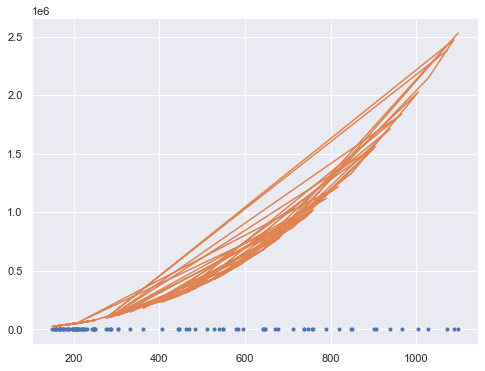

In [108]:
plt.plot(x_values,y_values, '.')
plt.plot(x_values,w0 + w1 * x_values + w2 * x_values**2 + w3 * x_values**3)

### Reporting the Error Values for 1b

#### Training SSE

In [122]:
sse = 0
for i in range(len(x_values)):
    sse = sse + (y_values[i] - (x_values[i]**3 * w3 + x_values[i]**2 * w2 + x_values[i] * w1 + w0))**2

For the second linear regression function, we have training SSE:

In [123]:
sse

55723098592043.734

In [136]:
error_matrix[1,0] = sse

#### Test MSE

In [124]:
test_mse = 0
for i in range(len(x_test_values)):
    test_mse = test_mse + (y_test_values[i] - (x_values[i]**3 * w3 + x_values[i]**2 * w2 + x_values[i] * w1 + w0)**2)**2
    
test_mse = test_mse / len(x_test_values)

For the second linear regression function, we have test MSE:

In [125]:
test_mse

1.0067236964134857e+19

In [138]:
error_matrix[1,1] = test_mse

#### s^2 for Test MSE

In [132]:
s_square = 0 
for i in range(len(x_test_values)):
    s_square = s_square + (test_mse - (y_test_values[i] - (x_values[i]**3 * w3 + x_values[i]**2 * w2 + x_values[i] * w1 + w0)**2)**2)   
s_square = s_square / (len(x_test_values)-1)

For the second linear regression function, we have s^2 for Test MSE:

In [140]:
s_square

-1724.6315789473683

In [141]:
error_matrix[1,2] = s_square

## Question 2 (Neural Networks)

First, we need to initialize input and output units.

In [292]:
#Initialize x and y

x = np.zeros((100,2))
x[:,0] = 1
tra = tra_df.to_numpy()
x[:,1] = tra[:,0]

y = np.zeros((100,1))
y[:,0] = tra[:,1]

For the first part of the question indexes are like this:

In [293]:
# Initialize indexes and parameters

K = 2
J = 4
I = 1
P = 100
alpha0 = 0.5
eta = 0.9
eps = 0.001

To have a looking good function, I wrote some functions:

In [294]:
# threshold units and derivatives

def omega(o):
    return o

def chi(h):
    e = 2.71828
    return (1 / (1 + e**(-h)))

def omega_prime(o):
    return 1

def chi_prime(h):
    return(chi(h) * ( 1 - chi(h)))

#### Backpropagation

In [295]:
def backpropagation(x,y,I,J,K,P,alpha0,eta,eps):
    # Initialize list and matrixes
    w = np.random.rand(J,K)
    W = np.random.rand(I,J)
    h = np.zeros((J,P))
    H = np.zeros((J,P))
    H[0,:] = -1 #\* H0p = −1 *\
    o = np.zeros((I,P))
    O = np.zeros((I,P))
    delta_o = np.zeros((I,P))
    delta_H = np.zeros((J,P))
    delta_W = np.zeros((I,J,P))
    delta_w = np.zeros((J,K,P))
    temp = 0
    t = 0
    alpha = []
    alpha.append(alpha0)
    
    while(True):
        for p in range(P):
            
            # \* from input to hidden *\
            for j in range(1,J):
                temp = 0
                for k in range(K):
                    temp = temp + w[j,k]*x[p,k]
                h[j,p] = temp    
                H[j,p] = chi(h[j,p])
            
            # \* from hidden to output *\
            for i in range(1,I+1):
                temp = 0
                for j in range(J):
                    temp = temp + W[i-1,j]*H[j,p]
                o[i-1,p] = temp
                O[i-1,p] = omega(o[i-1,p])
                
            #\* from output to hidden *\
            for i in range(1,I+1):
                delta_o[i-1,p] = (y[p,i-1] - O[i-1,p]) * omega_prime(o[i-1,p])
            
            # \* from hidden to input *\
            for j in range(1,J):
                delta_H[j,p] = chi_prime(h[j,p]) * W[0,j] * delta_o[0,p]
            
            # \* from output to hidden *\
            for i in range(1,I+1):
                for j in range(J):
                    delta_W[i-1,j,p] = alpha[t] * delta_o[i-1,p] * H[j,p]
                    W[i-1,j] = W[i-1,j] + delta_W[i-1,j,p]
                    
            # \* from hidden to input *\
            for j in range(1,J):
                for k in range(K):
                    delta_w[j,k,p] = alpha[t] * delta_H[j,p] * x[p,k]
                    w[j,k] = w[j,k] + delta_w[j,k,p]
        
        alpha.append(eta * alpha[t])
        t = t + 1
        if(alpha[t] < eps):
            break
            
    return w,W,O

After getting the model, in order to use that weights on test data, we need to write down another function

In [296]:
def input_to_output(w,W,I,J,K,P_test,x_test):
    h = np.zeros((J,P_test))
    H = np.zeros((J,P_test))
    H[0,:] = -1 #\* H0p = −1 *\
    o = np.zeros((I,P_test))
    O = np.zeros((I,P_test))
    
    for p in range(P_test):
        # \* from input to hidden *\
        for j in range(1,J):
            temp = 0
            for k in range(K):
                temp = temp + w[j,k]*x_test[p,k]
            h[j,p] = temp
            H[j,p] = chi(h[j,p])
            
        # \* from hidden to output *\
        for i in range(1,I+1):
            temp = 0
            for j in range(J):
                temp = temp + W[i-1,j]*H[j,p]
            o[i-1,p] = temp
            O[i-1,p] = omega(o[i-1,p])
    return O

Now, we need to decide how many hidden units we should have

In [297]:
def error_function(e_square,O,y_test,P_test):
    for p in range(P_test):
        e_square[p] = (y[p] - O[0,p])**2
            
    return e_square

In [298]:
def average_test_error(e_square, P_test):
    summ = 0
    MSE_test = 0
    for i in range(P_test):
        summ = summ + e_square[i]
    MSE_test = summ/P_test
    return MSE_test

In [299]:
def s_squaree(MSE_test,e_square,P_test):
    summ = 0
    s_square = 0
    for i in range(P_test):
        summ = summ + (MSE_test - e_square[i])**2
    s_square = summ / (P_test - 1)
    return s_square

In [300]:
def hidden_unit(x,y,x_test,y_test,I,J,K,P,alpha0,eta,eps):
    q = 1
    J = np.zeros(100)
    J[q] = 4
    MSE_test = np.zeros(100)
    MSE_test[0] = 1000000000000000000000000
    s_square_test = np.zeros(100)
    s_square_test[0] = 100000000000000
    
    while(True):
        temp_J = int(J[q])
        print(temp_J)
        output = backpropagation(x,y,I,temp_J,K,P,alpha0,eta,eps)
        w = output[0]
        W = output[1]
        O = input_to_output(w,W,I,temp_J,K,P_test,x_test)
        error = np.zeros(20)
        e_square = error_function(error,O,y_test,P_test)
        MSE_test[q] = average_test_error(e_square,P_test)
        s_square_test[q] = s_squaree(MSE_test[q],e_square,P_test)
        J[q+1] = J[q] + 1
        
        print("MSE_test[q]   =",MSE_test[q])
        print("MSE_test[q-1] =", MSE_test[q-1])
        
        if (MSE_test[q] > MSE_test[q-1]):
            break
        q = q + 1
    return J[q]
        

In [301]:
P_test = len(test)
J = np.zeros(100)
J[1] = 4
J_temp = J[1]
J_temp = int(J_temp)

In [302]:
#Initialize x_test and y_test

x_test = np.zeros((20,2))
x_test[:,0] = 1
x_test[:,1] = test[:,0]
y_test = np.zeros((20,1))
y_test[:,0] = test[:,1]

In [303]:
number_hidden_unit = hidden_unit(x,y,x_test,y_test,I,J,K,P,alpha0,eta,eps)

4
MSE_test[q]   = 72075.36151145402
MSE_test[q-1] = 1e+24
5
MSE_test[q]   = 72075.36151143804
MSE_test[q-1] = 72075.36151145402
6
MSE_test[q]   = 78742.55304923447
MSE_test[q-1] = 72075.36151143804


In [304]:
number_hidden_unit

6.0

So our final number of hidden units are 5 (included artificial node)

To calculate the errors we need to fix the indexes

In [305]:
# To indexes and parameters

K = 2
J = 5
I = 1
P = 100
alpha0 = 0.5
eta = 0.9
eps = 0.001


In [306]:
output = backpropagation(x,y,I,J,K,P,alpha0,eta,eps)

<ipython-input-294-57284098ac8f>:8: RuntimeWarning: overflow encountered in double_scalars
  return (1 / (1 + e**(-h)))


In [307]:
w = output[0]
W = output[1]
train_O = output[2]

In [308]:
test_O = input_to_output(w,W,I,J,K,P_test,x_test)

<ipython-input-294-57284098ac8f>:8: RuntimeWarning: overflow encountered in double_scalars
  return (1 / (1 + e**(-h)))


So now, we have observed values for both train and test data.

### Reporting the Error Values for 2a

#### Training SSE

In [309]:
sse = 0
for i in range(len(x_values)):
    sse = sse + (y_values[i] - train_O[0,i])**2

For the first neural network, we have training SSE:

In [310]:
sse

8001156.336858939

In [311]:
error_matrix[2,0] = sse

#### Test MSE

In [312]:
test_mse = 0
for i in range(len(x_test_values)):
    test_mse = test_mse + (y_test_values[i] - test_O[0,i])**2
    
test_mse = test_mse / len(x_test_values)

For the first neural network, we have Test MSE:

In [313]:
test_mse

98190.86021712724

In [314]:
error_matrix[2,1] = test_mse

#### s^2 for Test MSE


In [315]:
s_square = 0 
for i in range(len(x_test_values)):
    s_square = s_square + (test_mse - (y_test_values[i] - test_O[0,i])**2)   
s_square = s_square / (len(x_test_values)-1)

For the first neural network, we have s^2 for Test MSE:

In [316]:
s_square

4.595341651063216e-12

In [317]:
error_matrix[2,2] = s_square

### Question 2.b

First, we need to initialize input and output units.

In [318]:
#Initialize x and y

x = np.zeros((100,4))
x[:,0] = 1
tra = tra_df.to_numpy()
x[:,1] = tra[:,0]
x[:,2] = tra[:,0]**2
x[:,3] = tra[:,0]**3

y = np.zeros((100,1))
y[:,0] = tra[:,1]

In [319]:
#Initialize x_test and y_test

x_test = np.zeros((20,4))
x_test[:,0] = 1
x_test[:,1] = test[:,0]
x_test[:,2] = test[:,0]**2
x_test[:,3] = test[:,0]**3
y_test = np.zeros((20,1))
y_test[:,0] = test[:,1]

For the second part of the question indexes are like this:

In [320]:
# Initialize indexes and parameters

K = 4
J = 4
I = 1
P = 100
alpha0 = 0.5
eta = 0.9
eps = 0.001

In [321]:
number_hidden_unit = hidden_unit(x,y,x_test,y_test,I,J,K,P,alpha0,eta,eps)

4
MSE_test[q]   = 72075.36151145394
MSE_test[q-1] = 1e+24
5
MSE_test[q]   = 75379.04192452902
MSE_test[q-1] = 72075.36151145394


In [322]:
number_hidden_unit

5.0

So our final number of hidden units are 5 (included artificial node)

To calculate the errors we need to fix the indexes

In [323]:
# To indexes and parameters

K = 4
J = 5
I = 1
P = 100
alpha0 = 0.5
eta = 0.9
eps = 0.001


In [324]:
output = backpropagation(x,y,I,J,K,P,alpha0,eta,eps)

In [325]:
w = output[0]
W = output[1]
train_O = output[2]

In [326]:
test_O = input_to_output(w,W,I,J,K,P_test,x_test)

So now, we have observed values for both train and test data.

### Reporting the Error Values for 2.b

#### Training SSE

In [327]:
sse = 0
for i in range(len(x_values)):
    sse = sse + (y_values[i] - train_O[0,i])**2

For the second neural network, we have Test MSE:

In [328]:
sse

8006099.554465751

In [329]:
error_matrix[3,0] = sse

#### Test MSE

In [330]:
test_mse = 0
for i in range(len(x_test_values)):
    test_mse = test_mse + (y_test_values[i] - test_O[0,i])**2
    
test_mse = test_mse / len(x_test_values)

For the second neural network, we have Test MSE:

In [331]:
test_mse

98145.9425324774

In [332]:
error_matrix[3,1] = test_mse

#### s^2 for Test MSE

In [333]:
s_square = 0 
for i in range(len(x_test_values)):
    s_square = s_square + (test_mse - (y_test_values[i] - test_O[0,i])**2)   
s_square = s_square / (len(x_test_values)-1)

For the second neural network, we have s^2 for Test MSE:

In [334]:
s_square

-2.527437908084769e-11

In [335]:
error_matrix[3,2] = s_square

In [336]:
error_matrix

array([[ 3.83581159e+06,  1.95046754e+06,  8.56496617e+12],
       [ 5.57230986e+13,  1.00672370e+19, -1.72463158e+03],
       [ 8.00115634e+06,  9.81908602e+04,  4.59534165e-12],
       [ 8.00609955e+06,  9.81459425e+04, -2.52743791e-11]])

In [342]:
error_df = pd.DataFrame(error_matrix,
             index = ['1.(a)','1.(b)','2.(a)','2.(b)'],
             columns=['Training SSE', 
                      'Test MSE',
                     's^2 for Test MSE'])

### All Errors

In [343]:
error_df

,Training SSE,Test MSE,s^2 for Test MSE
1.(a),3.835812e+06,1.950468e+06,8.564966e+12
1.(b),5.572310e+13,1.006724e+19,-1.724632e+03
2.(a),8.001156e+06,9.819086e+04,4.595342e-12
2.(b),8.006100e+06,9.814594e+04,-2.527438e-11


- We can clearly see that Neural Network work better for both function in the test set.